# Library and data imports

In [88]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import  matplotlib.pyplot as plt

In [5]:
# Import datasets

cust_dim = pd.read_csv("Data/Cust_dim_table.csv")
prod_dim = pd.read_csv("Data/Prod_dim_table.csv")
sales_fact = pd.read_csv("Data/Sales_fact_final.csv")

print(f"cust_dim has shape {cust_dim.shape}\n")
print(f"prod_dim has shape {prod_dim.shape}\n")
print(f"sales_fact has shape {sales_fact.shape}\n")

cust_dim has shape (5001, 2)

prod_dim has shape (4997, 5)

sales_fact has shape (3159580, 7)



In [11]:
cust_dim.head()

,CUST_CODE,CUST_LIFESTAGE,CUST_LIFESTAGE_DESCRIPTION
0,CUST0000410727,OT,other
1,CUST0000634693,YF,young family
2,NaN,NaN,unclassified
3,CUST0000353957,PE,pensioners
4,CUST0000089820,OT,other


In [7]:
prod_dim.head()

,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40
0,PRD0900033,CL00201,DEP00067,G00021,D00005
1,PRD0900097,CL00001,DEP00001,G00001,D00001
2,PRD0900121,CL00063,DEP00019,G00007,D00002
3,PRD0900135,CL00201,DEP00067,G00021,D00005
4,PRD0900220,CL00051,DEP00013,G00005,D00002


In [8]:
sales_fact.head()

,CUST_CODE,PROD_CODE,SPEND,QUANTITY,BASKET_ID,STORE_CODE,SHOP_DATE
0,CUST0000291884,PRD0903750,1.57,1,994100100327348,E01,2006-04-10
1,CUST0000928648,PRD0901098,0.84,1,994100100709841,E03,2006-04-10
2,CUST0000928411,PRD0901383,0.40,1,994100100709694,E03,2006-04-10
3,CUST0000928411,PRD0901769,1.06,1,994100100709694,E03,2006-04-10
4,CUST0000928411,PRD0901850,0.88,1,994100100709694,E03,2006-04-10


# Cleaning Data

In [37]:
# Add description in Customer dimension
cust_dim['CUST_LIFESTAGE_DESCRIPTION'] = np.select(
    [
        cust_dim['CUST_LIFESTAGE'].isin(['YA']), 
        cust_dim['CUST_LIFESTAGE'].isin(['OA']),
        cust_dim['CUST_LIFESTAGE'].isin(['YF']),
        cust_dim['CUST_LIFESTAGE'].isin(['OF']),
        cust_dim['CUST_LIFESTAGE'].isin(['PE']),
        cust_dim['CUST_LIFESTAGE'].isin(['OT']),

    ], 
    [
        'young adult', 
        'older adult',
        'young family',
        'older family',
        'pensioners',
        'other',
    ], 
    default='unclassified'
)

# Clean Cust_dim with nan values in CUST_CODE column

cust_dim.dropna(inplace=True,subset=['CUST_CODE'])

In [19]:
# Convert SHOP_DATE to datetime and extract month and Year
sales_fact['SHOP_DATE']=pd.to_datetime(sales_fact['SHOP_DATE'], format='%Y-%m-%d')
sales_fact['SHOP_YEAR']  = sales_fact['SHOP_DATE'].dt.year
sales_fact['SHOP_MONTH']  = sales_fact['SHOP_DATE'].dt.month
sales_fact['TOTAL_SPEND']  = sales_fact['SPEND']*sales_fact['QUANTITY']


def combine(x):
    year=str(x[0])
    if(x[1]<10):
        month = '0' + str(x[1])
        return year+month
    else :
        month = str(x[1])
        return year+month
    
    
    
sales_fact['SHOP_YEAR_MONTH']=sales_fact[['SHOP_YEAR','SHOP_MONTH']].apply(combine, axis=1)

In [ ]:
# How many non loyalty members are there in sales data

sales_fact['LOYALTY_MEMBER'] = np.select(
    [
        sales_fact['CUST_CODE'].isnull().isin([True]), 
        sales_fact['CUST_CODE'].isnull().isin([False])

    ], 
    [
        'Not Loyalty Member', 
        'Loyalty Member'
    ], 
    default='unclassified'
)

#sales_fact['LOYALTY_MEMBER']  = sales_fact['CUST_CODE'].isnull()

In [51]:
sales_2007=sales_fact[sales_fact['SHOP_YEAR']==2007]
sales_2007.shape

(1414733, 11)

In [18]:
sales_2007.head()

,CUST_CODE,PROD_CODE,SPEND,QUANTITY,BASKET_ID,STORE_CODE,SHOP_DATE,SHOP_YEAR,SHOP_MONTH
1025274,CUST0000764276,PRD0903052,0.91,1,994103900565824,W02,2007-01-01,2007,1
1025275,CUST0000035935,PRD0902019,0.79,1,994103900161988,W01,2007-01-01,2007,1
1025276,CUST0000764276,PRD0903074,1.01,1,994103900565824,W02,2007-01-01,2007,1
1025277,CUST0000035935,PRD0901942,0.40,1,994103900161988,W01,2007-01-01,2007,1
1025278,CUST0000427023,PRD0904887,1.02,1,994103900378560,W02,2007-01-01,2007,1


# Data Exploration

## Key Takeaways from Exploration : 
1. For Sales fact : 
- There are 12 stores with most transactions in W02 and S02

2. For Customer dimension : 
- There is one null un `CUST_CODE` column
- There are 5000 unique customers (given by `CUST_CODE` column)
- In our customer dataset, the hisghest category of customers are Others, Young adult and young family

3. For Product dimension : 
- There are no NAs in any of the columns
- There are 4997 total products
    - With 250 PROD_CODE_10 categories
    - With 90 PROD_CODE_20 categories
    - With 31 PROD_CODE_30 categories
    - With 9 PROD_CODE_40 categories

In [12]:
sales_fact.STORE_CODE.value_counts()

W02    330388
S02    319584
N01    308559
N03    290429
N02    267923
W01    250271
S03    244591
E01    243228
E03    231633
E02    231554
S01    231171
W03    210249
Name: STORE_CODE, dtype: int64

In [27]:
# Are customer ids repeating -- NO , they are unique with one NULL (remove that null in CUST_CODE field)

cust_dim.CUST_CODE.value_counts().sort_values(ascending=False)

CUST0000559052    1
CUST0000932977    1
CUST0000468097    1
CUST0000924929    1
CUST0000124935    1
                 ..
CUST0000260311    1
CUST0000242508    1
CUST0000758801    1
CUST0000458484    1
CUST0000712188    1
Name: CUST_CODE, Length: 5000, dtype: int64

In [38]:
# How many customers are there? -5000 customers
cust_dim.CUST_CODE.nunique()

# How many customers in each CUST_LIFESTAGE_DESCRIPTION?
cust_dim.CUST_LIFESTAGE_DESCRIPTION.value_counts()

other           2288
young adult      627
young family     552
unclassified     521
older adult      503
pensioners       344
older family     165
Name: CUST_LIFESTAGE_DESCRIPTION, dtype: int64

In [34]:
# Do any of the roduct arrtibutes have NULL values

print(f"In table prod_dim For column PROD_CODE, number of nulls is {prod_dim['PROD_CODE'].isnull().sum()}")
print(f"In table prod_dim For column PROD_CODE_10,number of nulls is  {prod_dim['PROD_CODE_10'].isnull().sum()}")
print(f"In table prod_dim For column PROD_CODE_20, number of nulls is {prod_dim['PROD_CODE_20'].isnull().sum()}")
print(f"In table prod_dim For column PROD_CODE_30, number of nulls is {prod_dim['PROD_CODE_30'].isnull().sum()}")
print(f"In table prod_dim For column PROD_CODE_40, number of nulls is  {prod_dim['PROD_CODE_40'].isnull().sum()}")

In table prod_dim For column PROD_CODE, number of nulls is 0
In table prod_dim For column PROD_CODE_10,number of nulls is  0
In table prod_dim For column PROD_CODE_20, number of nulls is 0
In table prod_dim For column PROD_CODE_30, number of nulls is 0
In table prod_dim For column PROD_CODE_40, number of nulls is  0


In [47]:
# How many PROD_CODE_10 are there ? --250

prod_dim.PROD_CODE_10.value_counts().sort_values(ascending=False)
print(prod_dim.PROD_CODE_10.nunique())

250


In [45]:
# How many PROD_CODE_20 are there ? --90
prod_dim.PROD_CODE_20.value_counts().sort_values(ascending=False)
print(prod_dim.PROD_CODE_20.nunique())

90

In [44]:
# How many PROD_CODE_30 are there ? --31

prod_dim.PROD_CODE_30.value_counts().sort_values(ascending=False)
print(prod_dim.PROD_CODE_30.nunique())
prod_dim.PROD_CODE_30.unique()

array(['G00021', 'G00001', 'G00007', 'G00005', 'G00016', 'G00022',
       'G00013', 'G00002', 'G00003', 'G00010', 'G00015', 'G00004',
       'G00008', 'G00006', 'G00014', 'G00024', 'G00009', 'G00011',
       'G00023', 'G00028', 'G00029', 'G00027', 'G00017', 'G00031',
       'G00012', 'G00018', 'G00030', 'G00025', 'G00019', 'G00026',
       'G00020'], dtype=object)

In [46]:
# How many PROD_CODE_40 are there ? -- 9 
print(prod_dim.PROD_CODE_40.nunique())
prod_dim.PROD_CODE_40.value_counts().sort_values(ascending=False)


9


D00002    1788
D00003    1781
D00005     728
D00001     379
D00008     162
D00004     131
D00009      21
D00006       6
D00007       1
Name: PROD_CODE_40, dtype: int64

[Text(0.5, 1.0, 'Revenue per moonth in Berlin (E01)')]

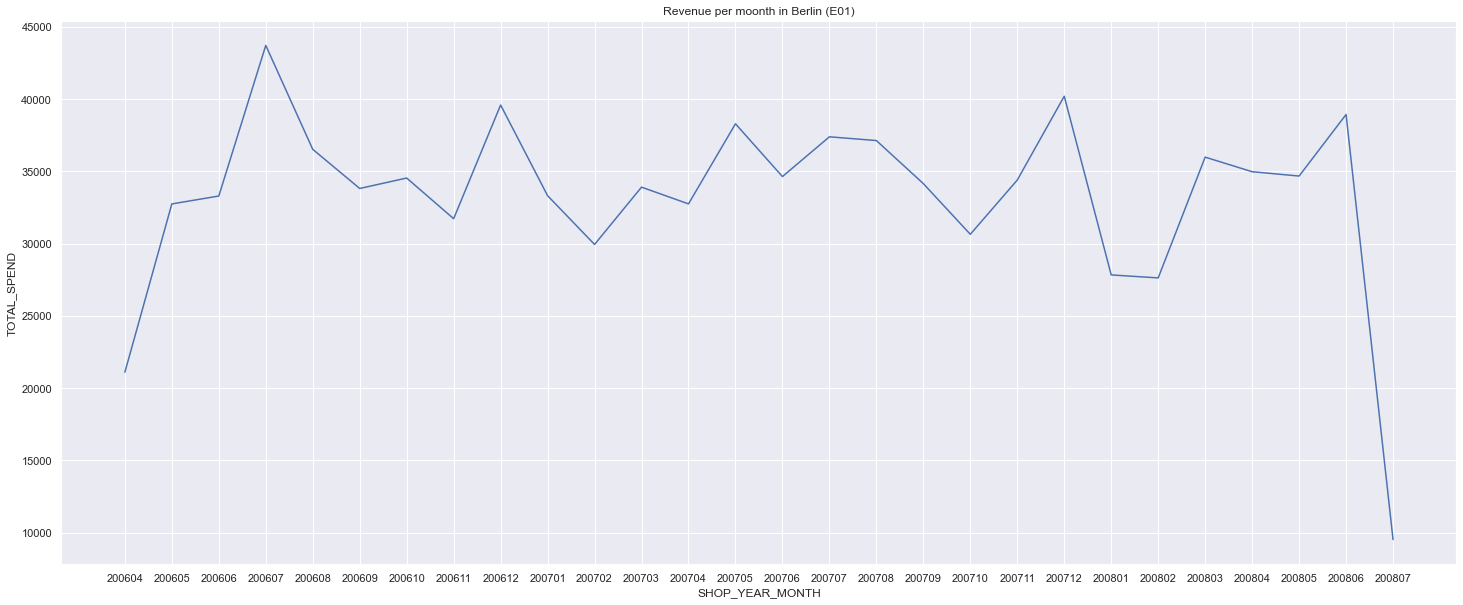

In [135]:
## Plot revenue per month for E01 store (Berlin)

E01 = sales_fact[sales_fact.STORE_CODE=="E01"]

E01[['SHOP_YEAR_MONTH','TOTAL_SPEND']].groupby('SHOP_YEAR_MONTH').sum().reset_index()
a4_dims = (25, 10)
fig, ax = plt.subplots(figsize=a4_dims)
g=sns.lineplot(data=E01[['SHOP_YEAR_MONTH','TOTAL_SPEND']].groupby('SHOP_YEAR_MONTH').sum().reset_index(), x="SHOP_YEAR_MONTH", y="TOTAL_SPEND",ax=ax, markers=True, dashes=False,sort=True)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title='Revenue per moonth in Berlin (E01)')


[Text(0.5, 1.0, 'Sales volume per month in Berlin (E01)')]

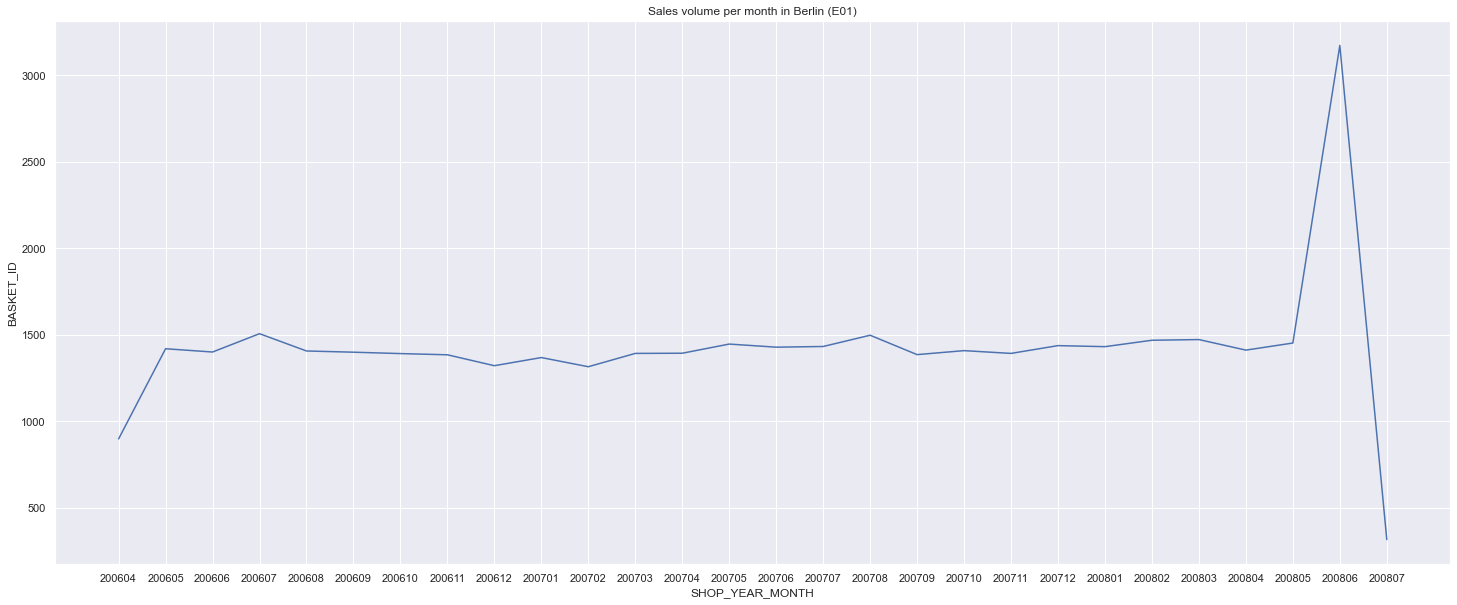

In [175]:
## Plot Sales volume per month for E01 store (Berlin)

E01 = sales_fact[sales_fact.STORE_CODE=="E01"]

data=E01[['SHOP_YEAR_MONTH','BASKET_ID']].groupby('SHOP_YEAR_MONTH').nunique().reset_index()
a4_dims = (25, 10)
fig, ax = plt.subplots(figsize=a4_dims)
g=sns.lineplot(data=data, x="SHOP_YEAR_MONTH", y="BASKET_ID",ax=ax, markers=True, dashes=False,sort=True)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title='Sales volume per month in Berlin (E01)')

The number of Baskets doubled in 2008 June because of a promotion in Berlin store in June 2008

# Calculation of Basket Penetration and  Penetration in terms of total spend

## Key Takeaways : 

1. Basket penetration = 79%
2. Revenue penetration = 76%

In [57]:
# For basket penetration

"""
Calc num of baskets of non-loyalty members = num_non_loyalty
calc num of baskets of loyalty members = num_loyalty
Calc num_loyalty/(num_loyalty +num_non_loyalty )
"""
num_non_loyalty = sales_2007[sales_2007['LOYALTY_MEMBER']=='Not Loyalty Member']['BASKET_ID'].nunique()
num_loyalty = sales_2007[sales_2007['LOYALTY_MEMBER']=='Loyalty Member']['BASKET_ID'].nunique()
basket_pen = num_loyalty/(num_non_loyalty+num_loyalty)
print(f"num_non_loyalty is {num_non_loyalty},\n num_loyalty is {num_loyalty}\n basket penetration is {basket_pen}")

num_non_loyalty is 45151,
 num_loyalty is 175467
 basket penetration is 0.7953430817068416


In [60]:
# For  penetration in total spend

"""
Calc total spend of non-loyalty members = num_non_loyalty
calc total spend of loyalty members = num_loyalty
Calc num_loyalty/(num_loyalty +num_non_loyalty )
"""
num_non_loyalty_spend = sales_2007[sales_2007['LOYALTY_MEMBER']=='Not Loyalty Member']['TOTAL_SPEND'].sum()
num_loyalty_spend = sales_2007[sales_2007['LOYALTY_MEMBER']=='Loyalty Member']['TOTAL_SPEND'].sum()
spend_pen = num_loyalty_spend/(num_non_loyalty_spend+num_loyalty_spend)
print(f"num_non_loyalty_spend is {num_non_loyalty_spend},\n num_loyalty_spend is {num_loyalty_spend}\n spend penetration is {spend_pen}")

num_non_loyalty_spend is 1435857.3699999994,
 num_loyalty_spend is 4645909.949999999
 spend penetration is 0.7639078750549767


If from industry benchmarks you knew that the basket penetration was lower than expected, but revenue penetration much higher, that means 
- Not all customers who make transactions are enrolled into this loyalty progran
- High spending Customers tend to prefer this loyalty program, as they might find this to be beneficial to them

## How many points were issued in 2007?

In [61]:
sales_2007.columns

Index(['CUST_CODE', 'PROD_CODE', 'SPEND', 'QUANTITY', 'BASKET_ID',
       'STORE_CODE', 'SHOP_DATE', 'SHOP_YEAR', 'SHOP_MONTH', 'TOTAL_SPEND',
       'LOYALTY_MEMBER'],
      dtype='object')

In [66]:
def calc_points(x):
    if(x[1]=='Not Loyalty Member'):
        return 0
    elif(x[1]=='Loyalty Member'):
        return int(x[0]/10)
    else : 
        return 0
    
sales_2007['Points Awarded']=sales_2007[['TOTAL_SPEND','LOYALTY_MEMBER']].apply(calc_points, axis=1)

C:\Users\ab6101571\.conda\envs\pycaret\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [67]:
sales_2007[sales_2007['Points Awarded']>1].head(10)

,CUST_CODE,PROD_CODE,SPEND,QUANTITY,BASKET_ID,STORE_CODE,SHOP_DATE,SHOP_YEAR,SHOP_MONTH,TOTAL_SPEND,LOYALTY_MEMBER,Points Awarded
1025413,CUST0000048357,PRD0902004,8.40,3,994103900168905,W02,2007-01-01,2007,1,25.20,Loyalty Member,2
1025431,CUST0000044470,PRD0901819,4.51,11,994103900166740,N01,2007-01-01,2007,1,49.61,Loyalty Member,4
1025479,CUST0000016376,PRD0900652,18.48,8,994103900151262,E03,2007-01-01,2007,1,147.84,Loyalty Member,14
1025481,CUST0000016376,PRD0902898,7.80,5,994103900151262,E03,2007-01-01,2007,1,39.00,Loyalty Member,3
1025495,CUST0000016376,PRD0900353,2.52,9,994103900151262,E03,2007-01-01,2007,1,22.68,Loyalty Member,2
1025510,CUST0000414522,PRD0904061,3.06,9,994103900371676,N02,2007-01-01,2007,1,27.54,Loyalty Member,2
1025542,CUST0000945336,PRD0902413,9.99,3,994103900667391,S03,2007-01-01,2007,1,29.97,Loyalty Member,2
1025575,CUST0000445924,PRD0904014,13.65,3,994103900388965,S02,2007-01-01,2007,1,40.95,Loyalty Member,4
1025604,CUST0000240308,PRD0903377,11.31,3,994103900275504,W03,2007-01-01,2007,1,33.93,Loyalty Member,3
1025656,CUST0000085435,PRD0904713,8.68,4,994103900189451,E03,2007-01-01,2007,1,34.72,Loyalty Member,3


In [70]:
print(f"Total points awarded(Total issuance) in 2007 is {sales_2007['Points Awarded'].sum()}")


Total points awarded(Total issuance) in 2007 is 240849


In [71]:
issuance = sales_2007['Points Awarded'].sum()
redemption = 170000

redemption/issuance

0.7058364369376663

The redemption to issuance ratio is 70%. 70% of the points issued to customers have been redeemed. We might have to consider the industry standards to know if this loyalty program is a success or not. 
- If the industry standard of redemption ratio for similar loyalty programs is above 70%, then we can say that the loyalty program is not working as expected.
- If the industry standard of redemption ratio for similar loyalty programs is less than 70%, then we can say that the loyalty program is working as expected.


# Promotional Analysis

## Analysis of Test group (Berlin-E01) against control group (Budapest-E03) for June 2008

In [155]:
E01_200806 = sales_fact[(sales_fact.STORE_CODE=="E01") & (sales_fact['SHOP_YEAR_MONTH']=="200806") ]
E03_200806 = sales_fact[(sales_fact.STORE_CODE=="E03") & (sales_fact['SHOP_YEAR_MONTH']=="200806") ]

In [185]:
E01_200806.head()

,CUST_CODE,PROD_CODE,SPEND,QUANTITY,BASKET_ID,STORE_CODE,SHOP_DATE,SHOP_YEAR,SHOP_MONTH,TOTAL_SPEND,LOYALTY_MEMBER,SHOP_YEAR_MONTH,Points Awarded
3016308,CUST0000508514,PRD0904962,6.27,3,994111200498487,E01,2008-06-01,2008,6,18.81,Loyalty Member,200806,1.1
3016310,NaN,PRD0902429,0.87,1,994111200062995,E01,2008-06-01,2008,6,0.87,Not Loyalty Member,200806,0.0
3016311,CUST0000365429,PRD0902787,2.03,1,994116401215716,E01,2008-06-01,2008,6,2.03,Loyalty Member,200806,0.0
3016319,CUST0000817991,PRD0903052,0.71,1,994111200699716,E01,2008-06-01,2008,6,0.71,Loyalty Member,200806,0.0
3016322,CUST0000139484,PRD0903767,1.68,3,994111200259711,E01,2008-06-01,2008,6,5.04,Loyalty Member,200806,0.0


In [159]:
# For Berlin Store in 2008 June

E01_200806 = sales_fact[(sales_fact.STORE_CODE=="E01") & (sales_fact['SHOP_YEAR_MONTH']=="200806") ]

cost_promotion_e01_200806 = 5000
E01_200806['Points Awarded']=E01_200806[['TOTAL_SPEND','LOYALTY_MEMBER']].apply(calc_points, axis=1)*1.1
total_points_E01_200806 = np.ceil(E01_200806['Points Awarded'].sum())
total_revenue_E01_200806 = E01_200806['TOTAL_SPEND'].sum()
sales_volume_E01_200806 = E01_200806['BASKET_ID'].nunique()

dollar_value_points_E01_200806 = np.ceil(total_points_E01_200806/10)

net_revenue_E01_200806 = total_revenue_E01_200806 - cost_promotion_e01_200806 - dollar_value_points_E01_200806
print(f"""
Total points awarded in 200806 in E01 is {total_points_E01_200806}\nTotal revenue generated in 200806 in E01 is {total_revenue_E01_200806}
Cost of promotion is {cost_promotion_e01_200806} 
Dollar value of points offerred in 200806 in E01 is {dollar_value_points_E01_200806}
Net revenue generated in 200806 in E01 is {net_revenue_E01_200806}
Sales volume generated in 200806 in E01 is {sales_volume_E01_200806} baskets
""")



Total points awarded in 200806 in E01 is 1503.0
Total revenue generated in 200806 in E01 is 38940.44
Cost of promotion is 5000 
Dollar value of points offerred in 200806 in E01 is 151.0
Net revenue generated in 200806 in E01 is 33789.44
Sales volume generated in 200806 in E01 is 3173 baskets



C:\Users\ab6101571\.conda\envs\pycaret\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [169]:
# For Budapest store

E03_200806 = sales_fact[(sales_fact.STORE_CODE=="E03") & (sales_fact['SHOP_YEAR_MONTH']=="200806") ]

cost_promotion_e03_200806 = 0
E03_200806['Points Awarded']=E03_200806[['TOTAL_SPEND','LOYALTY_MEMBER']].apply(calc_points, axis=1)*1.1
total_points_E03_200806 = np.ceil(E03_200806['Points Awarded'].sum())
total_revenue_E03_200806 = E03_200806['TOTAL_SPEND'].sum()
sales_volume_E03_200806 = E03_200806['BASKET_ID'].nunique()

dollar_value_points_E03_200806 = np.ceil(total_points_E03_200806/10)

net_revenue_E03_200806 = total_revenue_E03_200806 - cost_promotion_e03_200806 - dollar_value_points_E03_200806
print(f"""
Total points awarded in 200806 in E03 is {total_points_E03_200806}\nTotal revenue generated in 200806 in E03 is {total_revenue_E03_200806}
Cost of promotion is {cost_promotion_e03_200806} 
Dollar value of points offerred in 200806 in E03 is {dollar_value_points_E03_200806}
Net revenue generated in 200806 in E03 is {net_revenue_E03_200806}
Sales volume generated in 200806 in E03 is {sales_volume_E03_200806} baskets
""")



Total points awarded in 200806 in E03 is 1308.0
Total revenue generated in 200806 in E03 is 32937.270000000004
Cost of promotion is 0 
Dollar value of points offerred in 200806 in E03 is 131.0
Net revenue generated in 200806 in E03 is 32806.270000000004
Sales volume generated in 200806 in E03 is 1314 baskets



C:\Users\ab6101571\.conda\envs\pycaret\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:

# For Berlin Store in 2008 May

E01_200805 = sales_fact[(sales_fact.STORE_CODE=="E01") & (sales_fact['SHOP_YEAR_MONTH']=="200805") ]

cost_promotion_e01_200805 = 0
E01_200805['Points Awarded']=E01_200805[['TOTAL_SPEND','LOYALTY_MEMBER']].apply(calc_points, axis=1)*1.1
total_points_E01_200805 = np.ceil(E01_200805['Points Awarded'].sum())
total_revenue_E01_200805 = E01_200805['TOTAL_SPEND'].sum()
sales_volume_E01_200805 = E01_200805['BASKET_ID'].nunique()

dollar_value_points_E01_200805 = np.ceil(total_points_E01_200805/10)

net_revenue_E01_200805 = total_revenue_E01_200805 - cost_promotion_e01_200805 - dollar_value_points_E01_200805
print(f"""
Total points awarded in 200805 in E01 is {total_points_E01_200805}\nTotal revenue generated in 200805 in E01 is {total_revenue_E01_200805}
Cost of promotion is {cost_promotion_e01_200805} 
Dollar value of points offerred in 200805 in E01 is {dollar_value_points_E01_200805}
Net revenue generated in 200805 in E01 is {net_revenue_E01_200805}
Sales volume generated in 200805 in E01 is {sales_volume_E01_200805} baskets
""")



Total points awarded in 200805 in E01 is 1144.0
Total revenue generated in 200805 in E01 is 34677.93
Cost of promotion is 0 
Dollar value of points offerred in 200805 in E01 is 115.0
Net revenue generated in 200805 in E01 is 34562.93
Sales volume generated in 200805 in E01 is 1453 baskets



C:\Users\ab6101571\.conda\envs\pycaret\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
# Net difference between revenue in Berlin vs revenue in Budapest

print(f"""
Difference in revenue in Berlin (2008 June) vs revenue in Budapest (2008 June) is {net_revenue_E01_200806 - net_revenue_E03_200806}
Difference in revenue in Berlin (2008 June) vs Berlin (2008 May) is {net_revenue_E01_200806-net_revenue_E01_200805}

Difference in Baskets in Berlin (2008 June) vs baskets in Budapest(2008 June) is {sales_volume_E01_200806 - sales_volume_E03_200806}
Difference in Baskets in Berlin (2008 June) vs baskets in Berlin (2008 May) is {sales_volume_E01_200806 - sales_volume_E01_200805}

Lift In Terms of Revenue : 
Lift between Berlin (2008 June) vs Budapest (2008 June) = {(net_revenue_E01_200806 - net_revenue_E03_200806)*100/net_revenue_E01_200806}%
Lift between Berlin (2008 June) vs Berlin (2008 May) = {(net_revenue_E01_200806 - net_revenue_E01_200805)*100/net_revenue_E01_200806}%

Lift In Terms of Sales Volume : 
Lift between Berlin (2008 June) vs Budapest (2008 June) = {(sales_volume_E01_200806 - sales_volume_E03_200806)*100/sales_volume_E01_200806}%
Lift between Berlin (2008 June) vs Berlin (2008 May) = {(sales_volume_E01_200806 - sales_volume_E01_200805)*100/sales_volume_E01_200806}%

""")



Difference in revenue in Berlin (2008 June) vs revenue in Budapest (2008 June) is 983.1699999999983
Difference in revenue in Berlin (2008 June) vs Berlin (2008 May) is -773.489999999998

Difference in Baskets in Berlin (2008 June) vs baskets in Budapest(2008 June) is 1859
Difference in Baskets in Berlin (2008 June) vs baskets in Berlin (2008 May) is 1720

Lift In Terms of Revenue : 
Lift between Berlin (2008 June) vs Budapest (2008 June) = 2.9096960470490134%
Lift between Berlin (2008 June) vs Berlin (2008 May) = -2.2891471418289204%

Lift In Terms of Sales Volume : 
Lift between Berlin (2008 June) vs Budapest (2008 June) = 58.588086983926885%
Lift between Berlin (2008 June) vs Berlin (2008 May) = 54.20737472423574%




# Bayesian Causal Inference model

Cons of building a Bayesian Causal Inference Model : 
1. The promotion was introduced in the Berlin Store in 2008 June and we have data only till July 2008, and hence we do not have enough data to assess the impact of promotion in the post-promotion period
2. It is unclear if any other external factors affected the sales volume/revenue in the store, other than the promotion. While building a Bayesian model, we are oblivious to the fact that there could be external factors that could have affected the response variable (In this case, Sales volume or Revenue)

Link for Bayesian Causal Inference model
[Link](https://towardsdatascience.com/causal-inference-using-bayesian-structural-time-series-models-ab1a3da45cd0#:~:text=Causal%20inference%20is%20about%20determining,on%20a%20desired%20outcome%20metric.&text=This%20is%20where%20causal%20inference,which%20is%20called%20the%20counterfactual.)
